In [31]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

In [32]:
# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data = pd.read_csv(mouse_drug_data_to_load, delimiter=",")
mouse_data_df = pd.DataFrame(mouse_data)

clinicaltrial_data = pd.read_csv(clinical_trial_data_to_load,  delimiter=",")
clinicaltrial_data_df = pd.DataFrame(clinicaltrial_data)

# Combine the data into a single dataset
mouse_trialmerge = pd.merge(mouse_data_df, clinicaltrial_data_df, on="Mouse ID")
mouse_trialmerge_df = pd.DataFrame(mouse_trialmerge)

# Display the data table for preview
mouse_trialmerge_df.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


In [33]:
#re-order to look like sample
ROmouse_trialmerge_df = mouse_trialmerge_df[["Mouse ID", "Timepoint", "Tumor Volume (mm3)", "Metastatic Sites", "Drug"]]
ROmouse_trialmerge_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,f234,0,45.000000,0,Stelasyn
1,f234,5,47.313491,0,Stelasyn
2,f234,10,47.904324,0,Stelasyn
3,f234,15,48.735197,1,Stelasyn
4,f234,20,51.112713,2,Stelasyn


In [1]:
### DO NOT RUN THIS CELL####  sample output

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [34]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
TVgroupbyDT = mouse_trialmerge_df.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"]
avgTVgroupbyDT = TVgroupbyDT.mean()

# Convert to DataFrame (need to reset index)
avgTVgroupbyDT = avgTVgroupbyDT.reset_index()
avgTVgroupbyDT_df = pd.DataFrame(avgTVgroupbyDT)

# Preview DataFrame
avgTVgroupbyDT_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [2]:
### DO NOT RUN THIS CELL#### sample output

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [35]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
stdE_DT = TVgroupbyDT.sem()


# Convert to DataFrame
stdE_DT_df = pd.DataFrame(stdE_DT)
stdE_DT_df.reset_index(inplace=True)

# Preview DataFrame
stdE_DT_df.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [3]:
### DO NOT RUN THIS CELL#### sample output

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [36]:
# Minor Data Munging to Re-Format the Data Frames
pivot_avgTVgroupbyDT_df = avgTVgroupbyDT_df.pivot(index ='Timepoint',columns='Drug',values='Tumor Volume (mm3)')


# Preview that Reformatting worked
pivot_avgTVgroupbyDT_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [4]:
### DO NOT RUN THIS CELL####  sample output

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


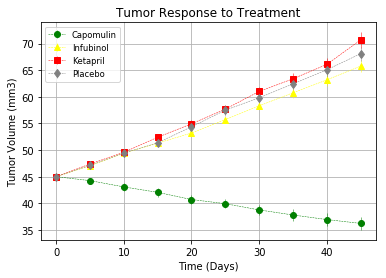

<Figure size 432x288 with 0 Axes>

In [37]:
# Generate the Plot (with Error Bars)
drug_list_format = [("Capomulin", "o", "green"), 
                    ("Infubinol", "^", "yellow"),
                    ("Ketapril", "s", "red"), 
                    ("Placebo", "d", "gray")]
for drug,marker,colors in drug_list_format:
    ste = stdE_DT[drug]
    stdE_DT_plt = plt.errorbar(pivot_avgTVgroupbyDT_df.index,pivot_avgTVgroupbyDT_df[drug],
                               ste,fmt=marker,ls='--',color=colors,linewidth=0.5)
plt.legend(loc='best', fontsize="small", fancybox=True)
plt.title('Tumor Response to Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.grid()   

# Show the Figure
plt.show()

# Save the Figure
plt.savefig('tumor_response_to_treatment.png', transparent=True, bbox_inches="tight")

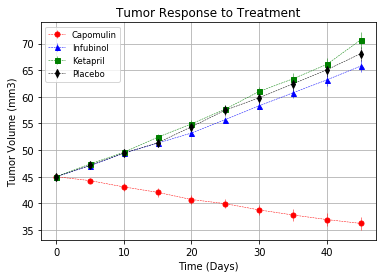

In [5]:
### DO NOT RUN THIS CELL####  sample output

# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [38]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
met_groupby = mouse_trialmerge.groupby(['Drug','Timepoint'])['Metastatic Sites']
avg_met_df = met_groupby.mean()

# Convert to DataFrame
avg_met_df = avg_met_df.reset_index()

# Preview DataFrame
avg_met_df.head()


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [6]:
### DO NOT RUN THIS CELL####  sample output

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [39]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
met_standard_errors = met_groupby.sem()

# Convert to DataFrame
met_standard_errors_df = pd.DataFrame(met_standard_errors)

# Preview DataFrame
met_standard_errors_df.reset_index(inplace=True)
met_standard_errors_df.head()



,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [7]:
### DO NOT RUN THIS CELL####  sample output

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [40]:
# Minor Data Munging to Re-Format the Data Frames
pivot_met_stde = avg_met_df.pivot(index ='Timepoint',columns='Drug',values='Metastatic Sites')


# Preview that Reformatting worked
pivot_met_stde.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [8]:
### DO NOT RUN THIS CELL####  sample output

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


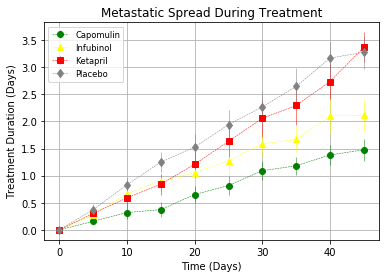

<Figure size 432x288 with 0 Axes>

In [41]:
# Generate the Plot (with Error Bars)

for drug,marker,colors in drug_list_format:
    ste = met_standard_errors[drug]
    Met_treatment_plt = plt.errorbar(pivot_met_stde.index,pivot_met_stde[drug],
                               ste,fmt=marker,ls='--',color=colors,linewidth=0.5)

plt.legend(loc='best', fontsize="small", fancybox=True)
plt.title('Metastatic Spread During Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Treatment Duration (Days)')
plt.grid()  

# Show the Figure
plt.show()

# Save the Figure
plt.savefig('metastatic_spread.png', transparent=True, bbox_inches="tight")


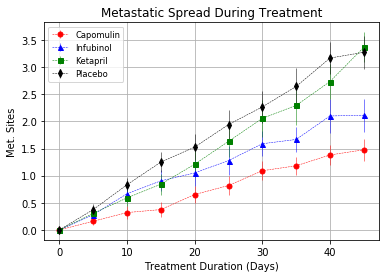

In [9]:
### DO NOT RUN THIS CELL#### 

## Survival Rates

In [47]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mouse_grouped_df = mouse_trialmerge_df.groupby(['Drug','Timepoint'])['Mouse ID']
count_mouse_df = mouse_grouped_df.nunique()
count_mouse_df = pd.DataFrame(count_mouse_df)

# Convert to DataFrame
count_mouse_df.reset_index(inplace=True)
count_mouse_df=count_mouse_df.rename(columns={'Mouse ID':'Mouse Count'})

# Preview DataFrame
count_mouse_df.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [10]:
### DO NOT RUN THIS CELL#### 

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [48]:
# Minor Data Munging to Re-Format the Data Frames
pivot_count_mouse_df = count_mouse_df.pivot(index='Timepoint',columns='Drug',values='Mouse Count')

# Preview the Data Frame
pivot_count_mouse_df.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,25,25,25,25
5,25,21,25,23,23,24,24,25,24,24
10,25,20,21,22,21,24,22,24,22,22
15,24,19,21,19,21,20,16,24,22,21
20,23,18,20,19,20,19,16,23,20,17


In [11]:
### DO NOT RUN THIS CELL#### 

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


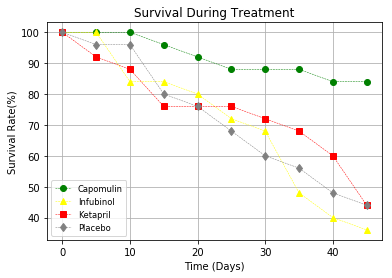

<Figure size 432x288 with 0 Axes>

In [51]:
# Generate the Plot (Accounting for percentages)
for drug,marker,colors in drug_list_format:
    total_mouse = pivot_count_mouse_df[drug][0]
    survival_rate = (pivot_count_mouse_df[drug]/total_mouse)*100
    survival_treatment_plt = plt.plot(pivot_count_mouse_df.index,survival_rate,
                                       marker=marker,ls='--',color=colors,linewidth=0.5)
plt.legend(loc='best', fontsize="small", fancybox=True)
plt.title('Survival During Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Survival Rate(%)')
plt.grid()  
    
# Show the Figure
plt.show()

# Save the Figure
plt.savefig('survival_rates.png', transparent=True, bbox_inches="tight")

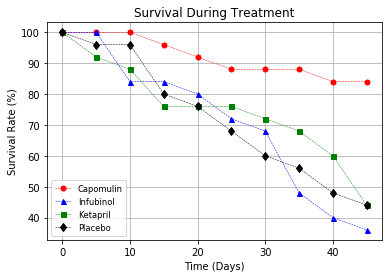

In [12]:
### DO NOT RUN THIS CELL#### 

## Summary Bar Graph

In [52]:
# Calculate the percent changes for each drug
percentage_change = (pivot_avgTVgroupbyDT_df.iloc[-1]/(pivot_avgTVgroupbyDT_df.iloc[0])-1)*100

# Display the data to confirm
percentage_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [13]:
### DO NOT RUN THIS CELL####  sample output

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

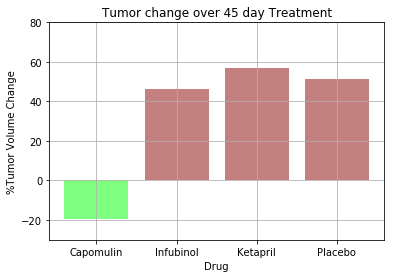

<Figure size 432x288 with 0 Axes>

In [57]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs
passing = percentage_change < 0


# Orient widths. Add labels, tick marks, etc. 
drug_list = ['Capomulin','Infubinol','Ketapril','Placebo']
change_list = [(percentage_change[drug])for drug in drug_list]

plt.bar(drug_list, change_list, alpha=0.5, align="center", color=passing.map({True:"lime", False:"darkred"}))
plt.grid()
plt.ylim(-30, 80)

plt.title("Tumor change over 45 day Treatment")
plt.ylabel("%Tumor Volume Change")
plt.xlabel("Drug")

# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Show the Figure
plt.show()

# Save the Figure
plt.savefig('tumor_change.png', transparent=True, bbox_inches="tight")

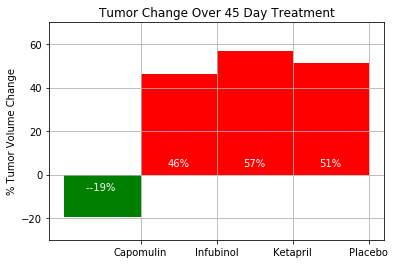

In [14]:
### DO NOT RUN THIS CELL#### 